In [1]:
from jedno_pudlo.sym import simulate_birth_death_process

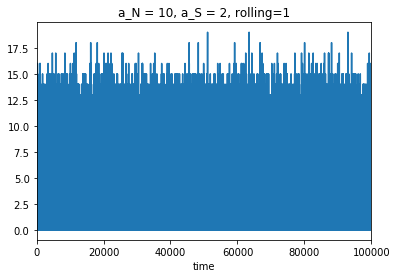

In [16]:
t = 100000
a_N = 10
a_S = 2
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

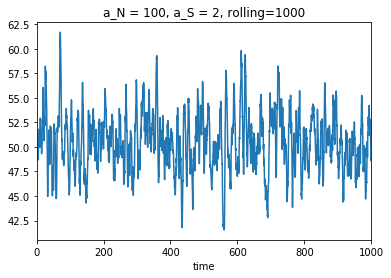

In [47]:
t = 1000
a_N = 100
a_S = 2
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1000
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

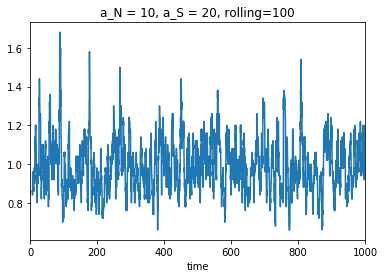

In [51]:
t = 1000
a_N = 10
a_S = 20
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 100
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

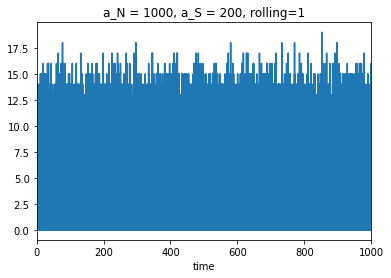

In [58]:
t = 1000
a_N = 1000
a_S = 200
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

In [19]:
t = 0.001
a_N = 100000
a_S = 4000

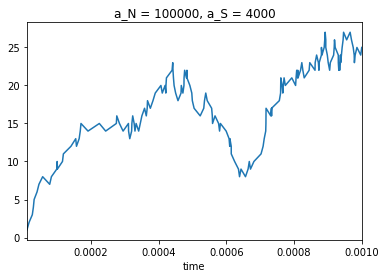

In [24]:
t = 0.001
a_N = 100000
a_S = 4000
df_total = simulate_birth_death_process(t, a_N, a_S)
df_total.set_index('time')['alive'].plot(title=f'a_N = {a_N}, a_S = {a_S}')

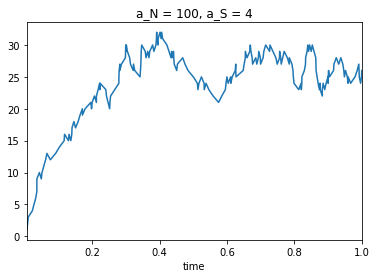

In [25]:
t = 1
a_N = 100
a_S = 4
df_total = simulate_birth_death_process(t, a_N, a_S)
df_total.set_index('time')['alive'].plot(title=f'a_N = {a_N}, a_S = {a_S}')

In [42]:
t = 1000
a_N = 100000
a_S = 4000
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 10000000
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

KeyboardInterrupt: 

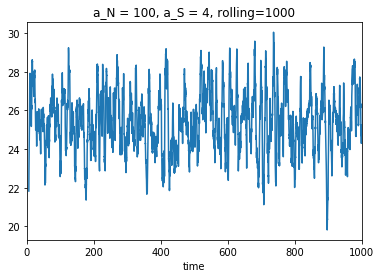

In [41]:
t = 1000
a_N = 100
a_S = 4
df_total = simulate_birth_death_process(t, a_N, a_S)
rolling_num = 1000
df_total.set_index('time')['alive'].rolling(rolling_num).mean().plot(title=f'a_N = {a_N}, a_S = {a_S}, rolling={rolling_num}')

In [21]:
df_total.head()

,time,type,balance,alive
87,0.000048,birth,1,1
102,0.000055,birth,1,2
74,0.000059,birth,1,3
37,0.000062,birth,1,4
102,0.000067,death,-1,3


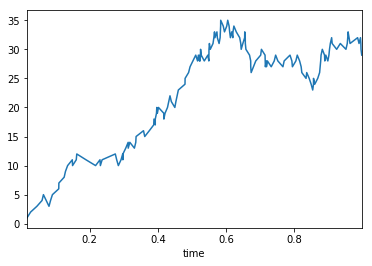

In [14]:
df_total.set_index('time')['alive'].plot()

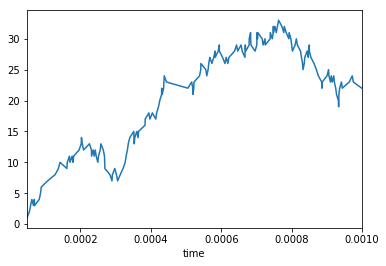

In [22]:
df_total.set_index('time')['alive'].plot()

In [57]:
t = 0.001
a_N = 100000
a_S = 4000
df_total = simulate_birth_death_process(t, a_N, a_S)
df_total['alive'].median()

20.0

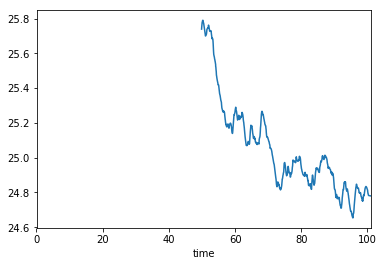

In [46]:
df_total.set_index('time')['alive'].rolling(10000).mean().plot()

In [42]:
(df_total['alive'] > 25).mean()

0.48651077904436835

In [41]:
df_total['alive'].mean()

25.49415826495088

In [24]:
df_total.head()

,time,type,balance,alive
1072177,0.011522,birth,1,1
3957931,0.040371,birth,1,2
1097954,0.068420,birth,1,3
3019514,0.080421,birth,1,4
5809421,0.087527,birth,1,5


In [17]:
df_total['time_lasting'] = df_total['time'].shift(-1) - df_total['time']

In [18]:
df_total = df_total[df_total['time'] < t]

In [19]:
df_total.head()

,time,type,balance,alive,time_lasting
915744,0.157349,birth,1,1,0.020811
16228,0.178160,birth,1,2,0.014800
16228,0.192960,death,-1,1,0.005106
913228,0.198065,birth,1,2,0.100279
387844,0.298344,birth,1,3,0.010014


In [20]:
weights = df_total.groupby('alive')['time_lasting'].sum() / t

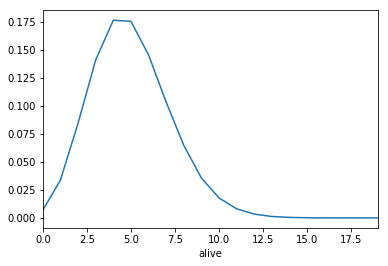

In [21]:
weights.plot()

In [13]:
import numpy as np
np.average(weights.index, weights = weights.values)

5.02469652657273

In [36]:
df_total['alive'].mean()

50.50040173161628

In [23]:
from scipy.stats import poisson

In [29]:
weights.keys().max()

19

In [31]:
for val, prob in weights.cumsum().items():
    print(val, prob)

0 0.006912249029480441
1 0.0407790257497006
2 0.12544426023351166
3 0.26662398775995166
4 0.4433001368569869
5 0.6190308891199048
6 0.7647225235024183
7 0.8682508084028381
8 0.933050633963051
9 0.9687059031485614
10 0.9865335942021474
11 0.9946416975488068
12 0.9980385274913649
13 0.9993080966456629
14 0.9997738516761754
15 0.9999276715759279
16 0.99997452294686
17 0.999992417262415
18 0.999997335631988
19 0.9999983447441343


In [40]:
def ks_stat(distr, mean=5):
    sup_diff = abs(poisson.cdf(distr.keys().max() + 1, mean) - distr.cumsum().max())
    diffs = np.abs([prob - poisson.cdf(val, mean) for val, prob in distr.cumsum().items()])
    print(diffs)
    print(sup_diff)
    return max(sup_diff, diffs.max())

In [41]:
ks_stat(weights)

[1.74302030e-04 3.51343755e-04 7.92240750e-04 1.59807246e-03
 2.80685179e-03 3.07023429e-03 2.53906053e-03 1.62248247e-03
 1.14426868e-03 5.33960455e-04 2.28862801e-04 9.47894618e-05
 5.73791188e-05 6.08662480e-06 1.05352352e-07 3.32018222e-06
 5.60800951e-06 2.16639932e-06 1.26267012e-06 1.31004228e-06]
1.5741633611066064e-06


0.003070234286841833

In [84]:
import numpy as np
arr = np.random.choice(weights.keys(), 10000000, p=weights.values * 1/weights.values.sum())

In [88]:
weights.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64', name='alive')

In [98]:
arr.shape

(10000000,)

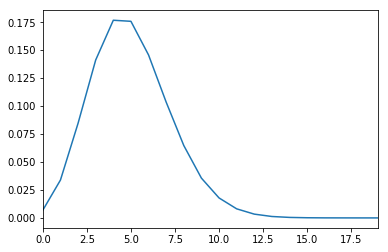

In [96]:
pd.Series(arr).value_counts(normalize=True).sort_index().plot()

In [50]:
from scipy.stats import kstest

In [104]:
kstest('poisson', False, [5,5], N=10000)

KstestResult(statistic=0.17379328506521258, pvalue=8.943329640271742e-263)

In [76]:
ys = [poisson.pmf(i, 5) for i in range(20)]

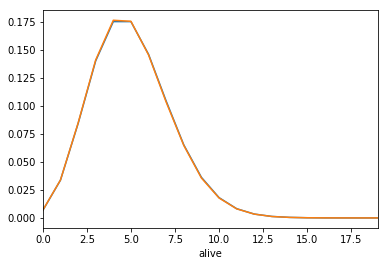

In [79]:
import matplotlib.pyplot as plt
plt.plot(ys)
weights.plot()

In [82]:
import pandas as pd
diff = pd.Series(ys) - weights

In [83]:
diff.abs().max() * 

0.0012087793291845894

In [45]:
weights.values.sum()

0.9999983447441342

In [27]:
poisson.cdf